In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
def BoxMuller(N=100):
    randu1 = np.random.random_sample(N)
    randu2 = np.random.random_sample(N)
    randn1 = [np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2) for u1, u2 in zip(randu1, randu2)]
    randn2 = [np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2) for u1, u2 in zip(randu1, randu2)]
    return randn1, randn2

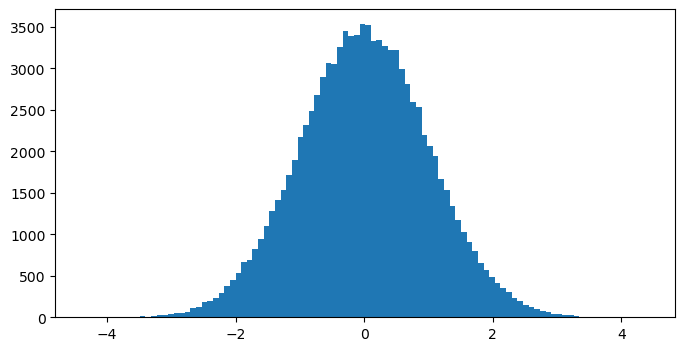

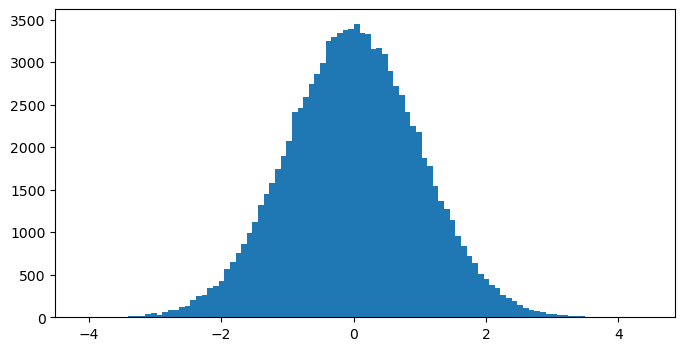

In [3]:
plt.figure(figsize=(8, 4))
plt.hist(BoxMuller(N=100000)[0], bins=100)
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(BoxMuller(N=100000)[1], bins=100)
plt.show()

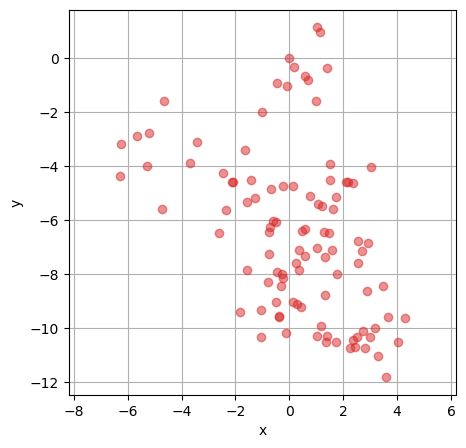

In [4]:
arr_x, arr_y = BoxMuller(N=100)
position_x = np.cumsum([0] + arr_x)  #累積和 x
position_y = np.cumsum([0] + arr_y)  #累積和 y

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(position_x,position_y,"C3o",alpha=0.5)
ax.axis("equal")
fig.savefig("2Drandomwalk.png", dpi=100,transparent = False, bbox_inches = 'tight')
plt.show()

xlim= ax.get_xlim()
ylim= ax.get_ylim()

#Animation
fig, ax = plt.subplots(figsize=(5,5))
p1, = ax.plot([], [],'o-',color='C3',alpha=0.5)
ax.grid()
ax.set(xlim=xlim, ylim=ylim)

def update(i):
    p1.set_data((position_x[:i],position_y[:i]))
    
    return fig,

ani = animation.FuncAnimation(fig, update, 101,interval=20, blit=True)
ani.save('rw2d_anim.mp4',dpi=100)
HTML(ani.to_html5_video())

## 説明
コードブロック1でライブラリのインポート  
コードブロック2でボックスミュラーの関数定義  
コードブロック3で数が十分大きいときにボックスミュラーの関数で生成される乱数が正規分布に従うことを確認  
コードブロック4の3行目までで初期値0と生成した100個の乱数を連結したリストに対し，累積和をとることで各時刻でのx，y座標をposition_x, position_yに格納．
それ以降の行で描画  